# Alura course - Temporal analysis

## Importing libs

In [1]:
from helper.data_acquisition import from_url
from helper.data_manipulation import unzip

## Downloading data

In [2]:
from_url('https://s3.amazonaws.com/caelum-online-public/1119-time-series-pandas/material/material+curso+-+Time+Series.zip')

In [3]:
unzip('./data/material+curso+-+Time+Series.zip', './data/')

## importing libs

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
from matplotlib import pyplot as plt

%matplotlib inline

## Alucar - analysing sales

In [7]:
alucar = pd.read_csv('./data/material curso - Time Series/alucar.csv')

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
alucar.shape

(24, 2)

In [10]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [11]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [12]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [13]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

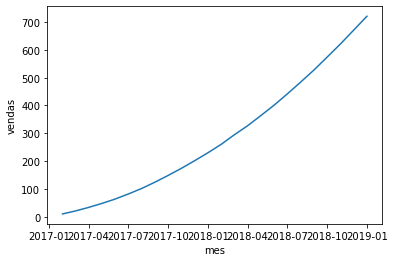

In [14]:
sns.lineplot(x='mes', y='vendas', data=alucar)

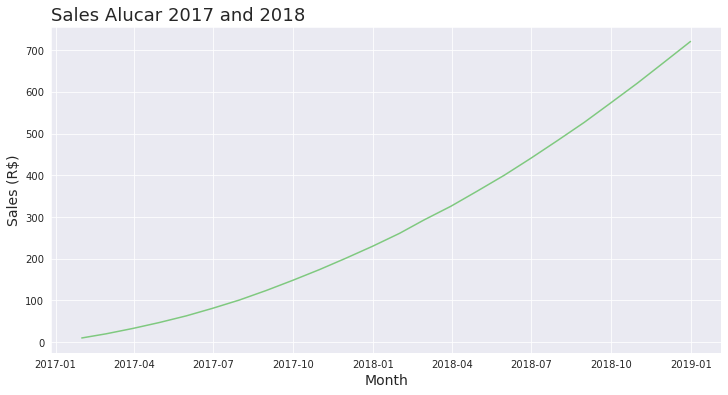

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Sales Alucar 2017 and 2018', loc='left', fontsize=18)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Sales (R$)', fontsize=14)
ax = ax

In [16]:
alucar['aumento'] = alucar['vendas'].diff()

In [17]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


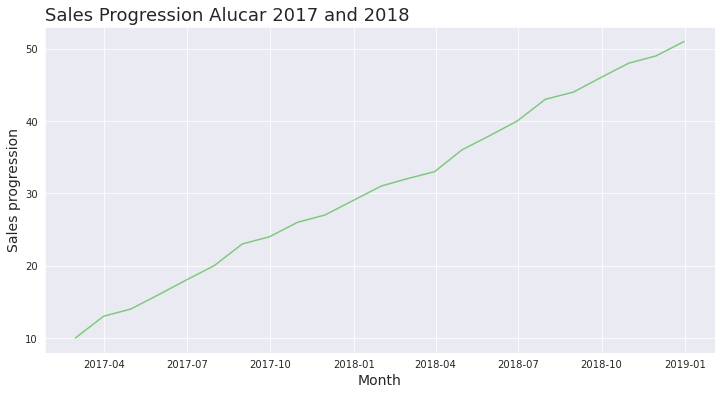

In [18]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Sales Progression Alucar 2017 and 2018', loc='left', fontsize=18)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Sales progression', fontsize=14)
ax = ax

In [19]:
def plot_line(title, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

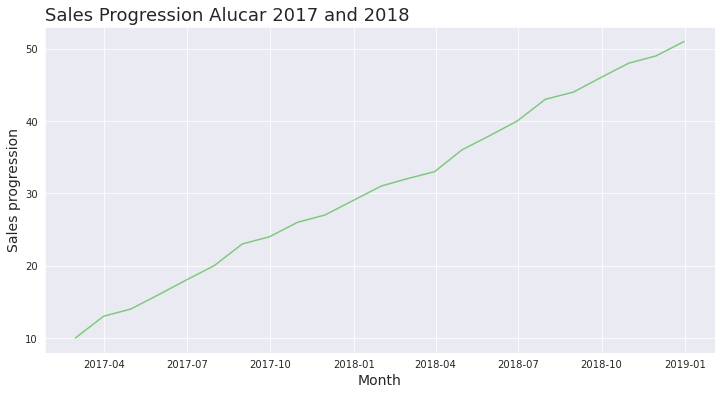

In [20]:
plot_line('Sales Progression Alucar 2017 and 2018', 'Month', 'Sales progression', 'mes', 'aumento', alucar)

In [21]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


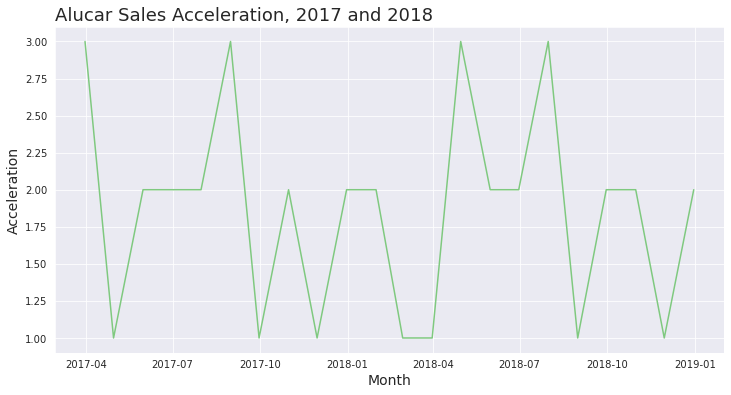

In [22]:
plot_line('Alucar Sales Acceleration, 2017 and 2018', 'Month', 'Acceleration', 'mes', 'aceleracao', alucar)

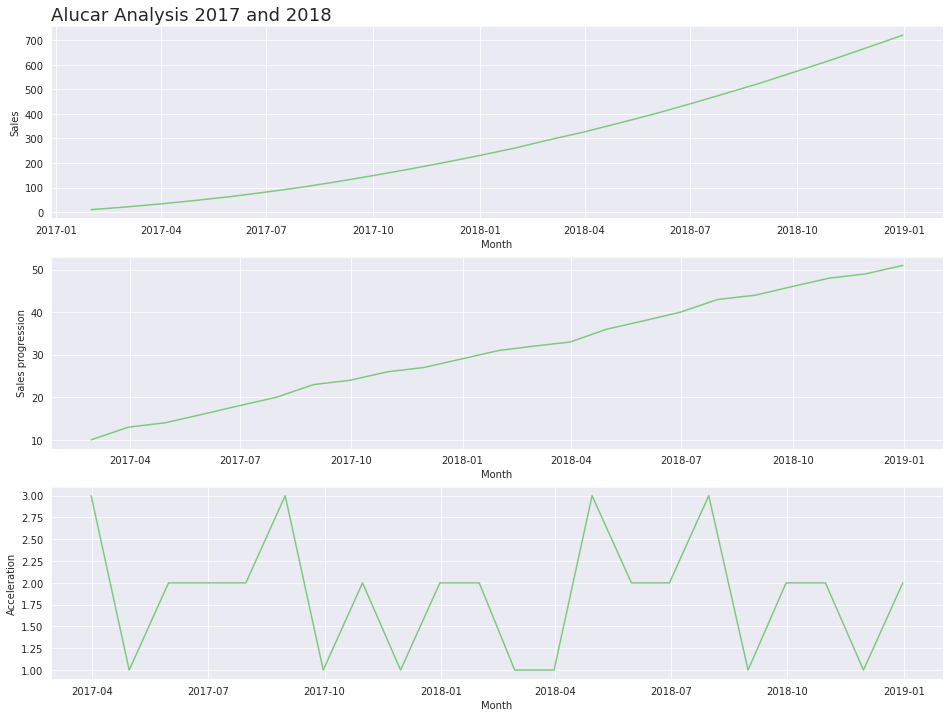

In [23]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(3, 1, 1)
ax.set_title('Alucar Analysis 2017 and 2018', loc='left', fontsize=18)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
sns.lineplot(x='mes', y='vendas', data=alucar)

ax = plt.subplot(3, 1, 2)
ax.set_xlabel('Month')
ax.set_ylabel('Sales progression')
sns.lineplot(x='mes', y='aumento', data=alucar)


ax = plt.subplot(3, 1, 3)
ax.set_xlabel('Month')
ax.set_ylabel('Acceleration')
sns.lineplot(x='mes', y='aceleracao', data=alucar)

ax = ax

In [24]:
def comparation_plot(definitions):
    plt.figure(figsize=(16, 12))

    for ix in range(len(definitions)):
        chart = definitions[ix]
        
        ax = plt.subplot(len(definitions), 1, ix+1)
        if 'title' in chart: ax.set_title(chart['title'], loc='left', fontsize=18)
        if 'xlabel' in chart: ax.set_xlabel(chart['xlabel'])
        if 'ylabel' in chart: ax.set_ylabel(chart['ylabel'])
        sns.lineplot(x=chart['x'], y=chart['y'], data=chart['data'])

    ax = ax

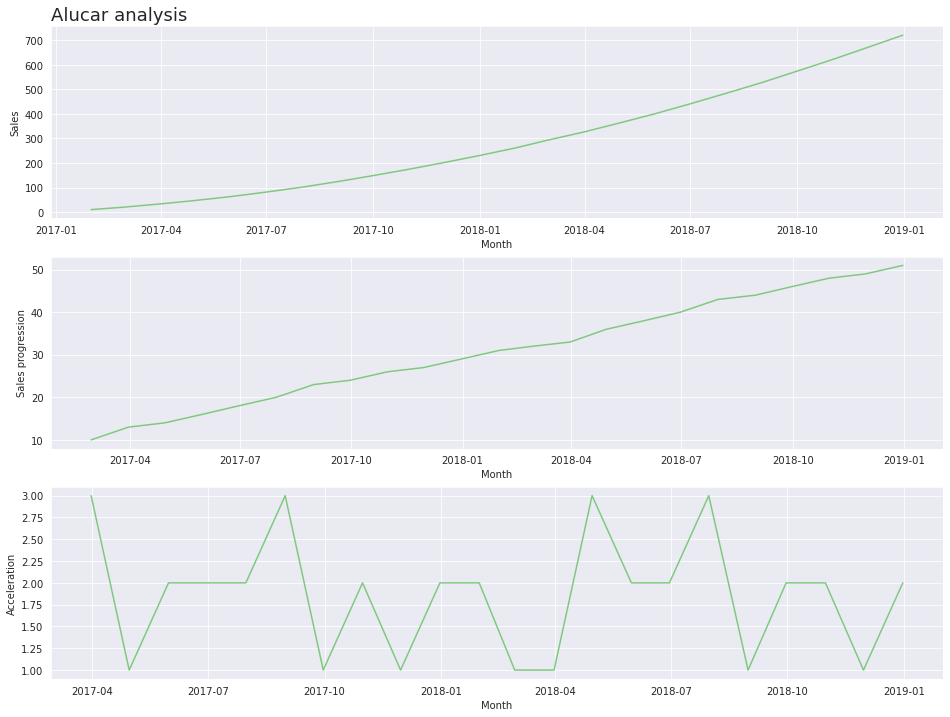

In [25]:
comparation_plot([ 
                    { 'title': 'Alucar analysis', 'xlabel': 'Month', 'ylabel': 'Sales', 'x': 'mes', 'y': 'vendas', 'data': alucar },
                    { 'xlabel': 'Month', 'ylabel': 'Sales progression', 'x': 'mes', 'y': 'aumento', 'data': alucar } ,
                    { 'xlabel': 'Month', 'ylabel': 'Acceleration', 'x': 'mes', 'y': 'aceleracao', 'data': alucar } 
                 ])

In [26]:
from pandas.plotting import autocorrelation_plot

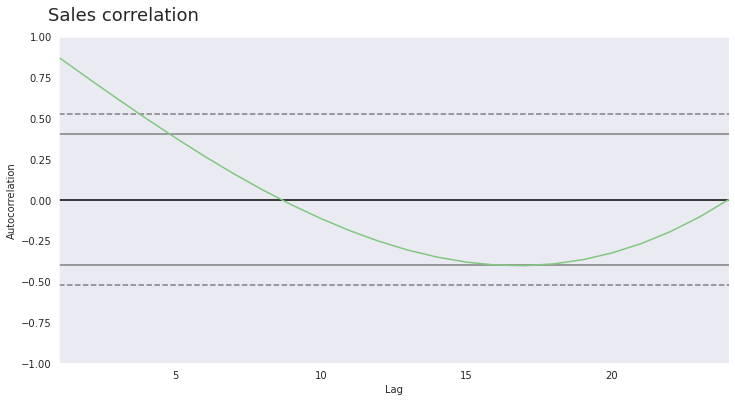

In [27]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Sales correlation', fontsize=18, x=.20, y=.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

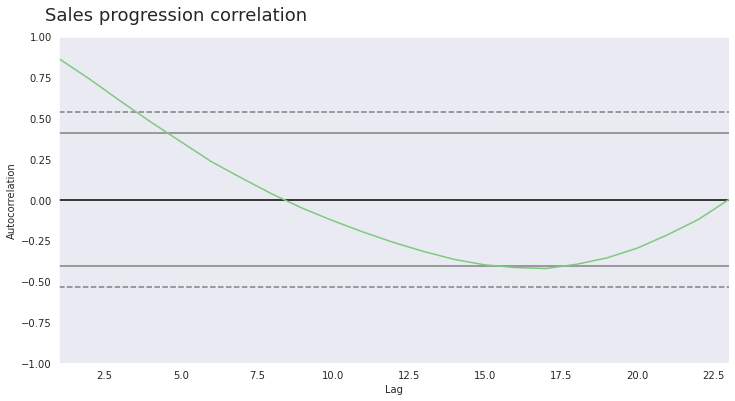

In [28]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Sales progression correlation', fontsize=18, x=.26, y=.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

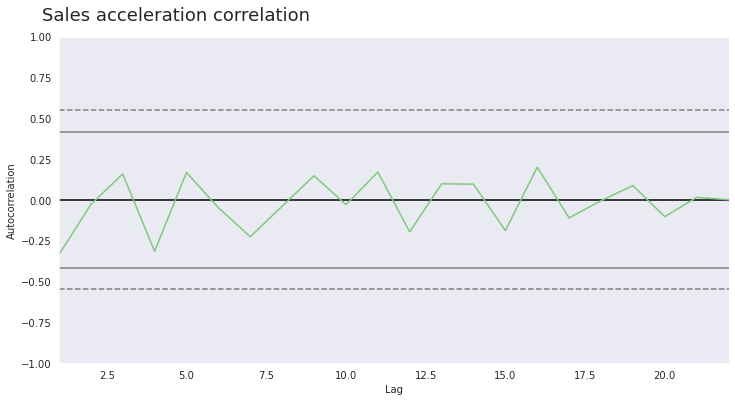

In [29]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Sales acceleration correlation', fontsize=18, x=.26, y=.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

## Alucar - analysing newsletter subscriptions

In [30]:
subscriptions = pd.read_csv('./data/material curso - Time Series/newsletter_alucar.csv')
subscriptions.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [31]:
subscriptions.shape

(24, 2)

In [32]:
subscriptions.dtypes

mes           object
assinantes     int64
dtype: object

In [33]:
subscriptions['mes'] = pd.to_datetime(subscriptions['mes'])

In [34]:
subscriptions.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [35]:
subscriptions.rename(columns={ 'mes': 'Month', 'assinantes': 'Subscriptions' }, inplace=True)

In [36]:
subscriptions['Increase'] = subscriptions.Subscriptions.diff()
subscriptions['Acceleration'] = subscriptions.Increase.diff()

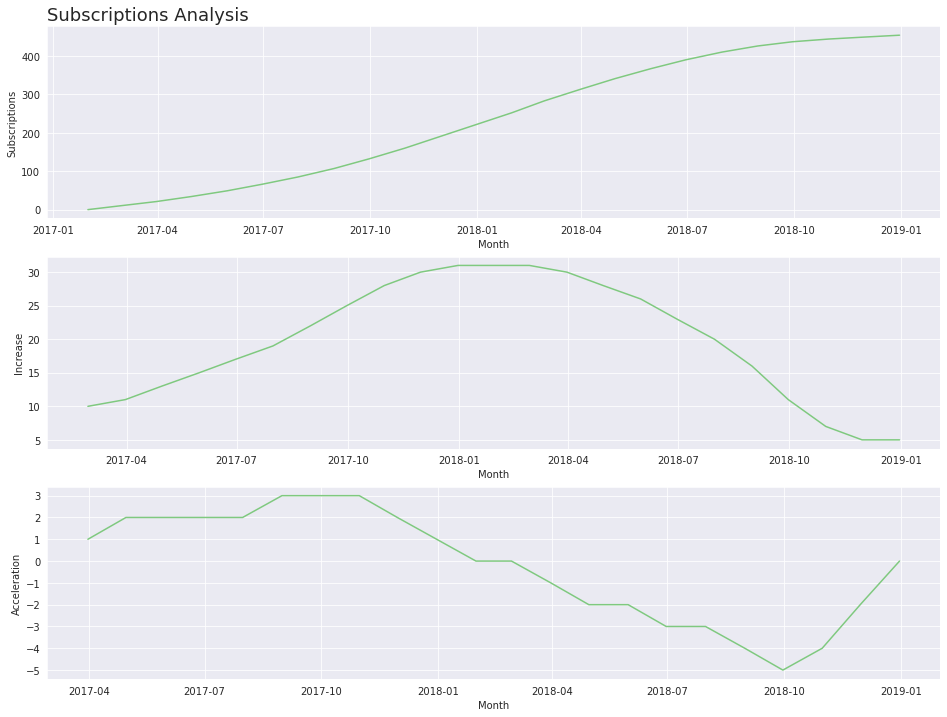

In [37]:
comparation_plot([
    { 'title': 'Subscriptions Analysis', 'x': 'Month', 'y':'Subscriptions', 'data': subscriptions },
    { 'x': 'Month', 'y': 'Increase', 'data': subscriptions },
    { 'x': 'Month', 'y': 'Acceleration', 'data': subscriptions },
])

## Chocolura - analysis sales seasonality

In [38]:
chocolura = pd.read_csv('./data/material curso - Time Series/chocolura.csv')

In [39]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [41]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [42]:
chocolura.shape

(24, 2)

In [43]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [44]:
chocolura.rename(columns={ 'mes': 'Month', 'vendas': 'Sales' }, inplace=True)

In [45]:
chocolura['Increase'] = chocolura.Sales.diff()
chocolura['Acceleration'] = chocolura.Increase.diff()

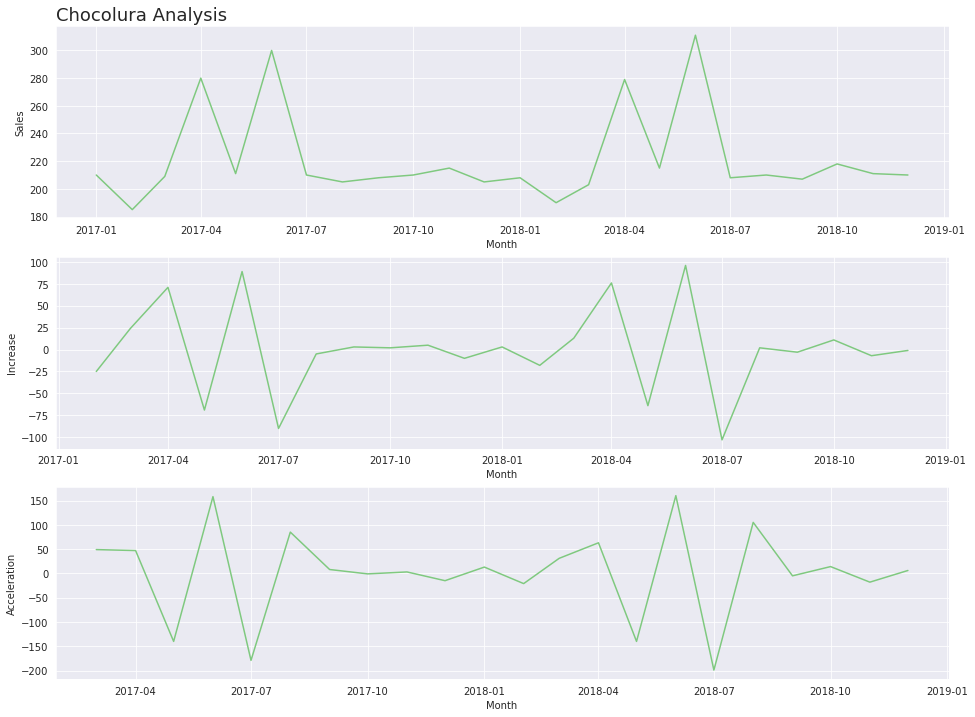

In [46]:
comparation_plot([
    { 'title': 'Chocolura Analysis', 'x': 'Month', 'y':'Sales', 'data': chocolura },
    { 'x': 'Month', 'y': 'Increase', 'data': chocolura },
    { 'x': 'Month', 'y': 'Acceleration', 'data': chocolura },
])

## Chocolura - Daily sales (October and november)

In [47]:
chocolura_daily = pd.read_csv('./data/material curso - Time Series/vendas_por_dia.csv')
chocolura_daily.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [48]:
chocolura_daily.shape

(61, 2)

In [49]:
chocolura_daily.isna().sum()

dia       0
vendas    0
dtype: int64

In [50]:
chocolura_daily.dtypes

dia       object
vendas     int64
dtype: object

In [51]:
chocolura_daily['dia'] = pd.to_datetime(chocolura_daily['dia'])

In [52]:
chocolura_daily.rename(columns={ 'dia': 'Day', 'vendas': 'Sales' }, inplace=True)

In [53]:
chocolura_daily.dtypes

Day      datetime64[ns]
Sales             int64
dtype: object

In [54]:
chocolura_daily['Increase'] = chocolura_daily.Sales.diff()
chocolura_daily['Acceleration'] = chocolura_daily.Increase.diff()

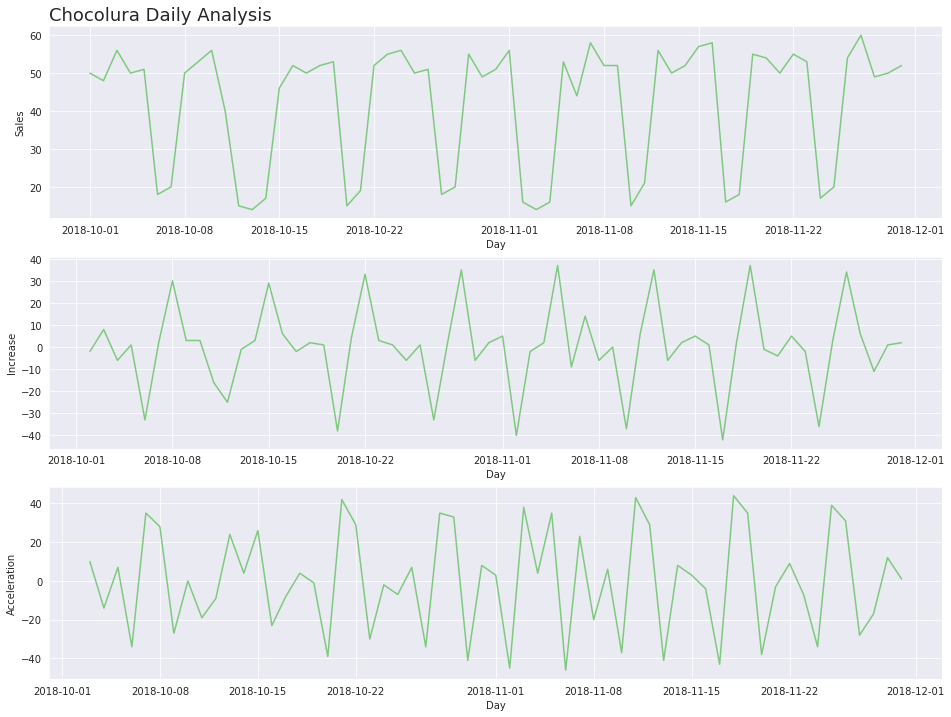

In [55]:
comparation_plot([
    { 'title': 'Chocolura Daily Analysis', 'x': 'Day', 'y':'Sales', 'data': chocolura_daily },
    { 'x': 'Day', 'y': 'Increase', 'data': chocolura_daily },
    { 'x': 'Day', 'y': 'Acceleration', 'data': chocolura_daily },
])

### Analysing the seasonality

In [56]:
chocolura_daily['Weekday'] = chocolura_daily['Day'].dt.day_name()

In [57]:
chocolura_daily.head()

,Day,Sales,Increase,Acceleration,Weekday
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [58]:
chocolura_daily_group = chocolura_daily.groupby('Weekday')[['Sales', 'Increase', 'Acceleration']]

In [59]:
chocolura_daily_group.mean().round(2)

,Sales,Increase,Acceleration
Weekday,,,
Friday,44.56,-6.78,-5.00
Monday,52.33,33.75,30.75
Saturday,15.88,-27.75,-19.88
Sunday,18.88,3.00,30.75
Thursday,51.33,-1.78,-3.22
Tuesday,51.67,-0.67,-34.25
Wednesday,53.11,1.44,2.11


### Daily sales correlation

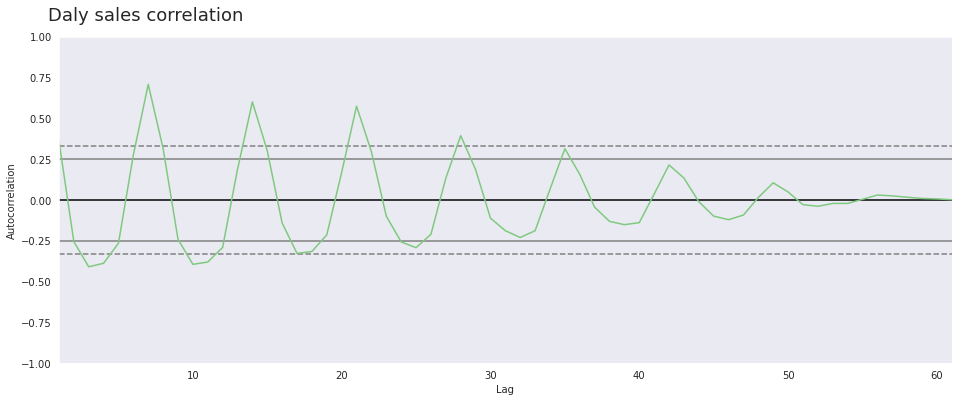

In [60]:
ax = plt.figure(figsize=(16, 6))
ax.suptitle('Daly sales correlation', fontsize=18, x=0.2, y=0.95)
autocorrelation_plot(chocolura_daily['Sales'])
ax = ax

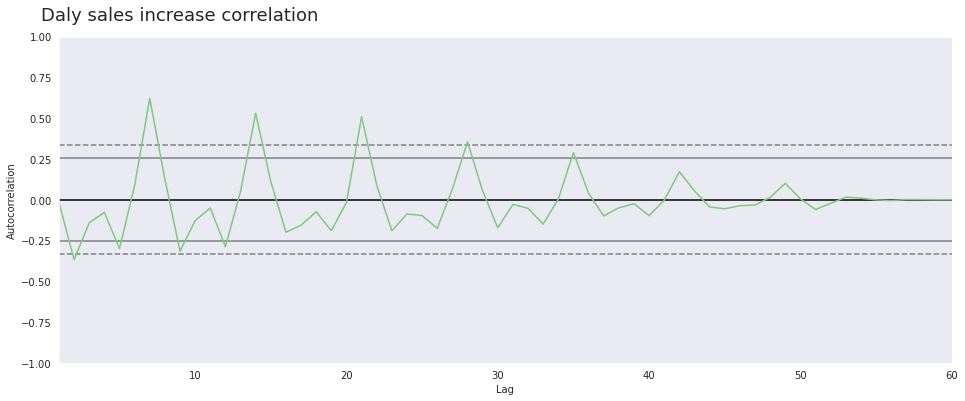

In [61]:
ax = plt.figure(figsize=(16, 6))
ax.suptitle('Daly sales increase correlation', fontsize=18, x=0.23, y=0.95)
autocorrelation_plot(chocolura_daily['Increase'][1:])
ax = ax

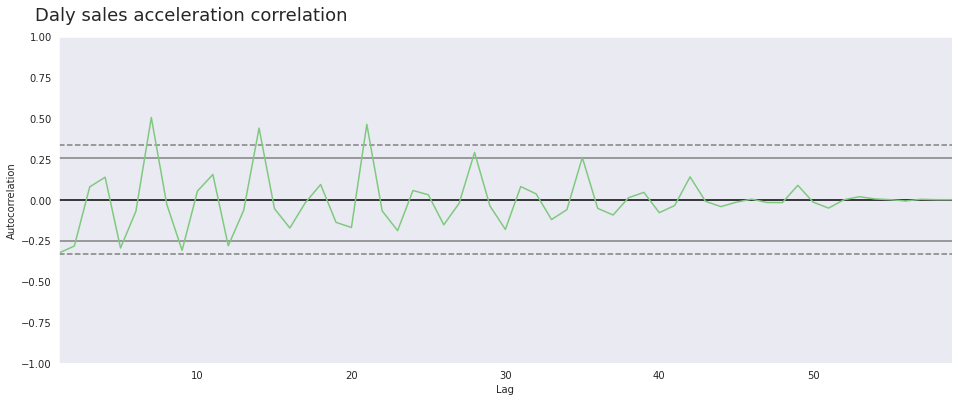

In [62]:
ax = plt.figure(figsize=(16, 6))
ax.suptitle('Daly sales acceleration correlation', fontsize=18, x=0.24, y=0.95)
autocorrelation_plot(chocolura_daily['Acceleration'][2:])
ax = ax

## Cafelura - Sales Analysis

In [63]:
cafelura = pd.read_csv('./data/material curso - Time Series/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [64]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [65]:
cafelura.rename(columns={ 'mes': 'Month', 'vendas': 'Sales' }, inplace=True)

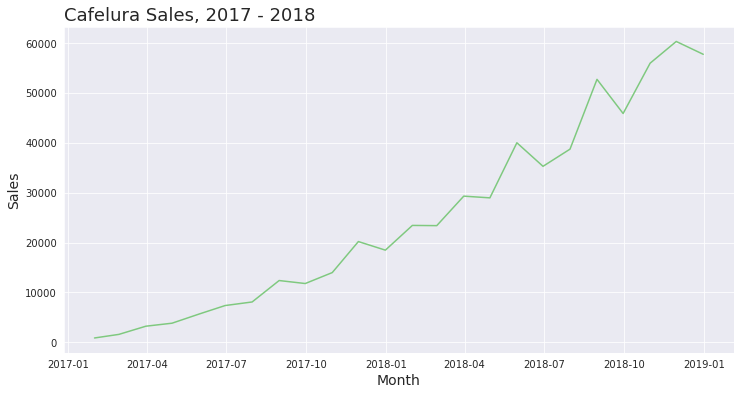

In [66]:
plot_line('Cafelura Sales, 2017 - 2018', 'Month', 'Sales', 'Month', 'Sales', cafelura)

In [67]:
weekend_days_count = pd.read_csv('./data/material curso - Time Series/dias_final_de_semana.csv')
weekend_days_count.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [68]:
weekend_days_count.rename(columns={ 'quantidade_de_dias': 'days_count' }, inplace=True)

In [69]:
cafelura['Normalized_Sales'] = cafelura['Sales'] / weekend_days_count['days_count']

In [70]:
cafelura.head()

,Month,Sales,Normalized_Sales
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


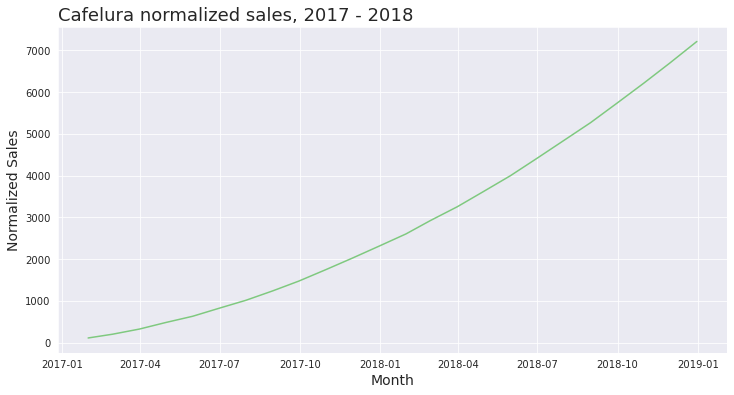

In [71]:
plot_line('Cafelura normalized sales, 2017 - 2018', 'Month', 'Normalized Sales', 'Month', 'Normalized_Sales', cafelura)

## Statsmodels

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

<Figure size 1152x432 with 0 Axes>

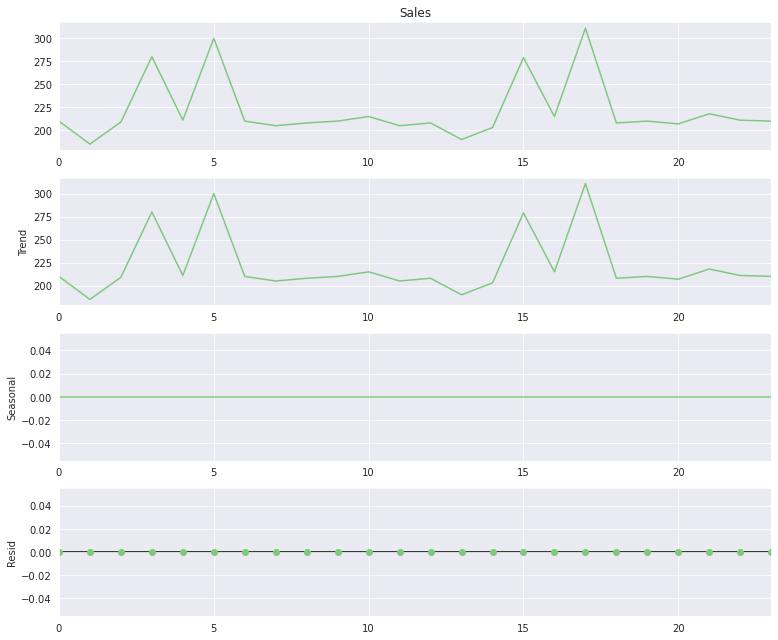

In [73]:
result = seasonal_decompose(chocolura['Sales'], period=1)
ax = plt.figure(figsize=(16, 6))
ax = result.plot()

<Figure size 1152x432 with 0 Axes>

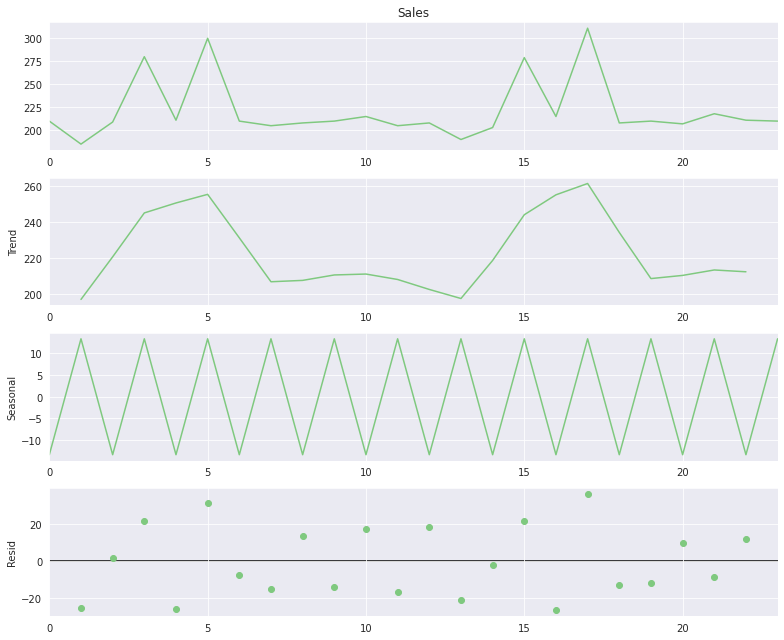

In [74]:
result = seasonal_decompose(chocolura['Sales'], period=2)
ax = plt.figure(figsize=(16, 6))
ax = result.plot()

<Figure size 1152x432 with 0 Axes>

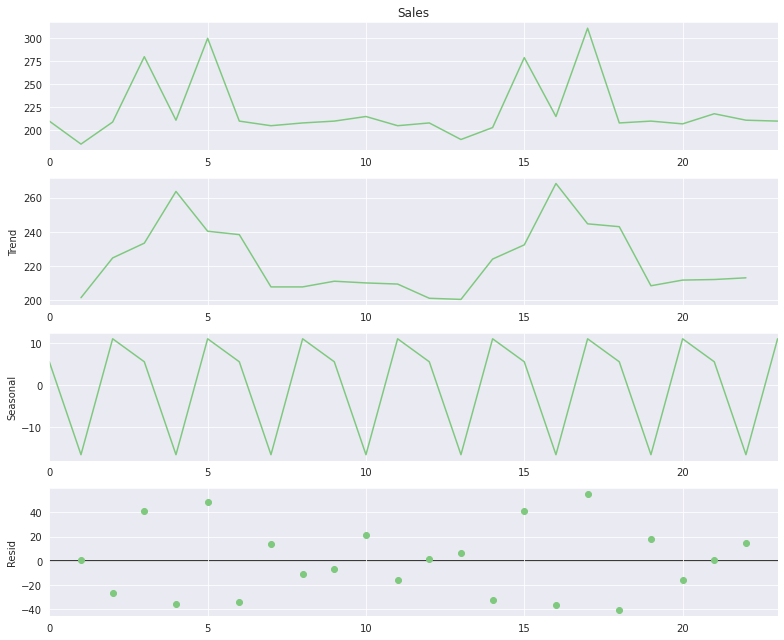

In [75]:
result = seasonal_decompose(chocolura['Sales'], period=3)
ax = plt.figure(figsize=(16, 6))
ax = result.plot()

In [76]:
observed = result.observed
trend = result.trend
seasonal =  result.seasonal
resid =  result.resid

In [77]:
data = ({
    'Observed': observed,
    'Trend': trend,
    'Seasonal': seasonal,
    'Resid': resid
})

In [78]:
result = pd.DataFrame(data)
result.head()

,Observed,Trend,Seasonal,Resid
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


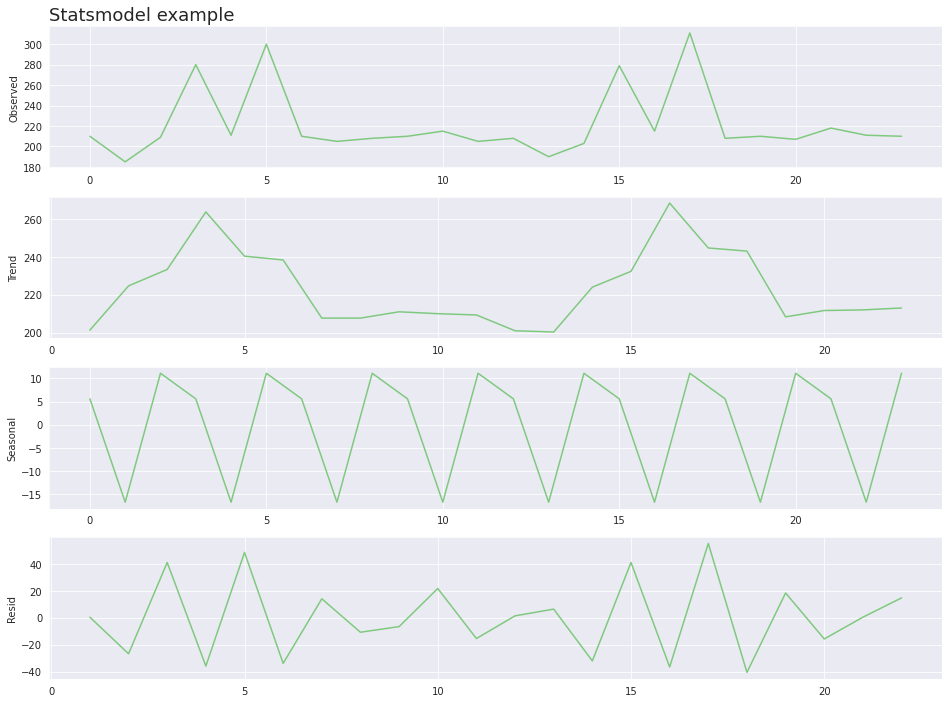

In [79]:
comparation_plot([
    { 'title': 'Statsmodel example', 'x': result.index, 'y':'Observed', 'data': result },
    { 'x': result.index, 'y': 'Trend', 'data': result },
    { 'x': result.index, 'y': 'Seasonal', 'data': result },
    { 'x': result.index, 'y': 'Resid', 'data': result },
])

## Alucel - Sales analysis

In [80]:
alucel = pd.read_csv('./data/material curso - Time Series/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [81]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [82]:
alucel.rename(columns={ 'dia': 'Day', 'vendas': 'Sales' }, inplace=True)

In [83]:
alucel['Increase'] = alucel['Sales'].diff()
alucel['Acceleration'] = alucel['Increase'].diff()

alucel.head()

,Day,Sales,Increase,Acceleration
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


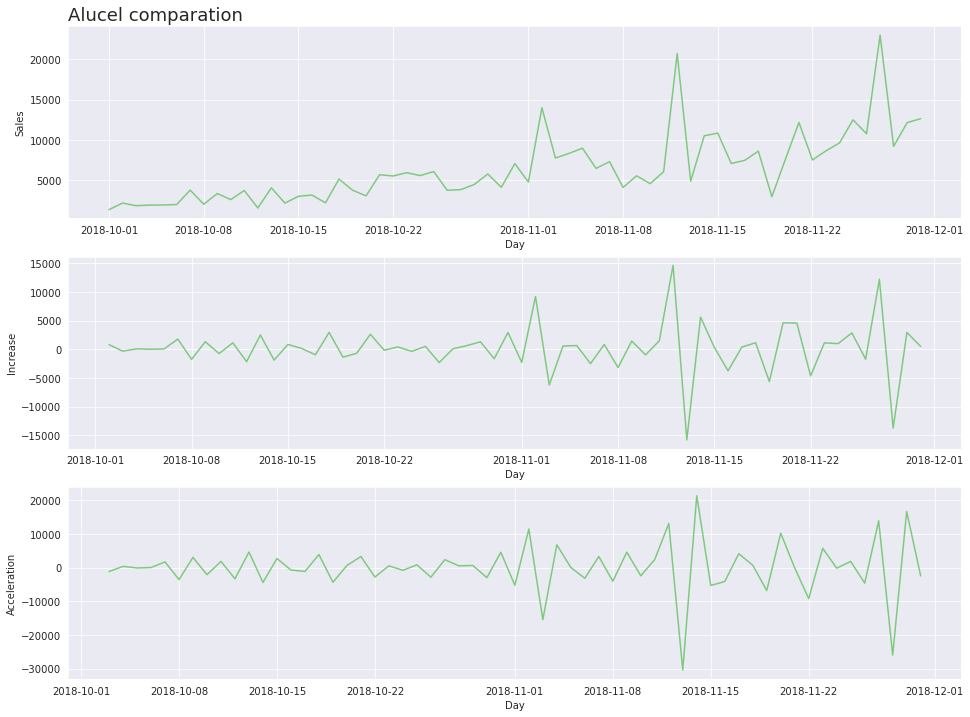

In [84]:
comparation_plot([
    { 'title': 'Alucel comparation', 'x': 'Day', 'y':'Sales', 'data': alucel },
    { 'x': 'Day', 'y': 'Increase', 'data': alucel },
    { 'x': 'Day', 'y': 'Acceleration', 'data': alucel },
])

## Moving Average

In [85]:
alucel['Moving_Average'] = alucel['Sales'].rolling(7).mean()

In [86]:
alucel.head(10)

,Day,Sales,Increase,Acceleration,Moving_Average
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


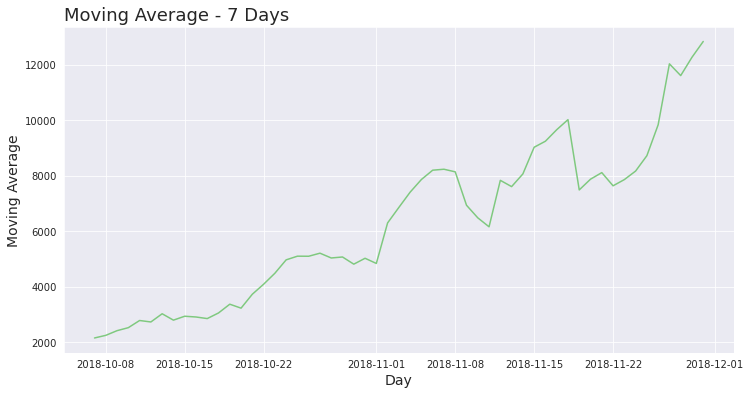

In [87]:
plot_line('Moving Average - 7 Days', 'Day', 'Moving Average', 'Day', 'Moving_Average', alucel)

In [88]:
alucel['Moving_Average_21'] = alucel['Sales'].rolling(21).mean()

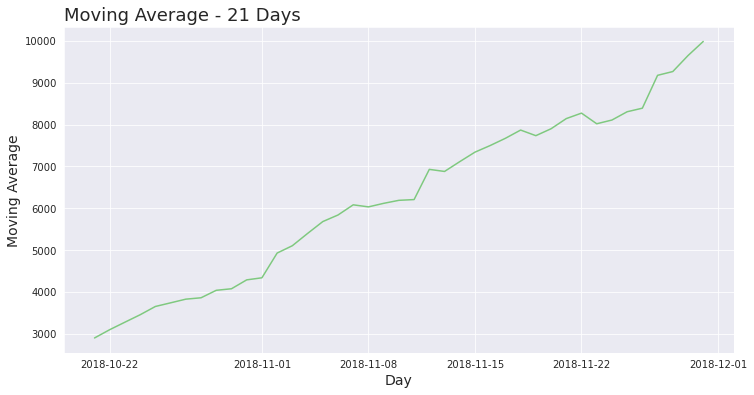

In [89]:
plot_line('Moving Average - 21 Days', 'Day', 'Moving Average', 'Day', 'Moving_Average_21', alucel)